## Создание и визуализация простых графов

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import math

## 1.

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1.

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


**1.1. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)**

In [4]:
def generate_ring_graph(n):
    G = nx.Graph() # Создаём пустой граф
    G.add_nodes_from(range(n)) # Добавляем n узлов в граф

    for i in range(n):
        G.add_edge(i, (i + 1) % n)  # соединяем текущий узел с следующим (последний с первым)
    return G

In [5]:
n = 15
G = generate_ring_graph(n)

**1.2. Визуализировать граф, построенный с помощью фукнции из задания 1.**

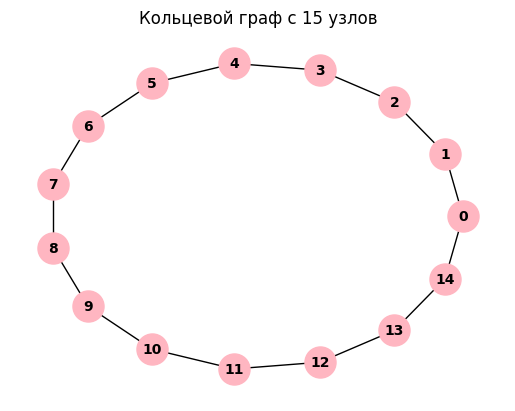

In [6]:
pos = nx.circular_layout(G)
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, ax=ax, node_size=500, node_color='lightpink', font_size=10, font_weight='bold')

plt.title(f'Кольцевой граф с {n} узлов')
plt.show()

## 2.

2\.1\. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.

2\.2\. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

2\.3\. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

2\.4\. Модифицировать функцию 2\.2\. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

2\.5-2\.8 Аналогичные задачи для треугольных решеток.

2\.9-2\.12\* Аналогичные задачи для гексогональных решеток.

**2.1. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.**

In [7]:
G = nx.grid_2d_graph(5, 4)

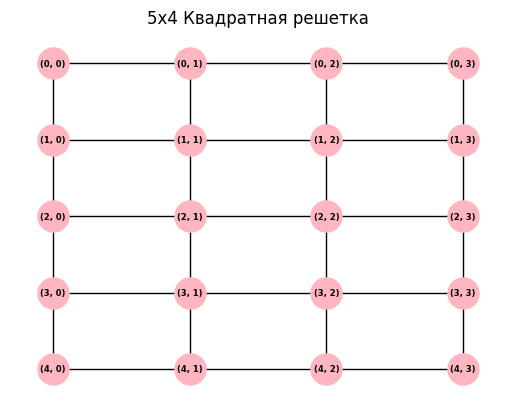

In [8]:
pos = {node: (node[1], -node[0]) for node in G.nodes()}
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title('5x4 Квадратная решетка')
plt.show()

**2.2. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.**

In [9]:
def generate_grid_graph(n, m):
    G = nx.Graph()

    # Добавляем узлы
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))

    # Добавляем рёбра
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))

    return G

In [10]:
G = generate_grid_graph(5, 4)

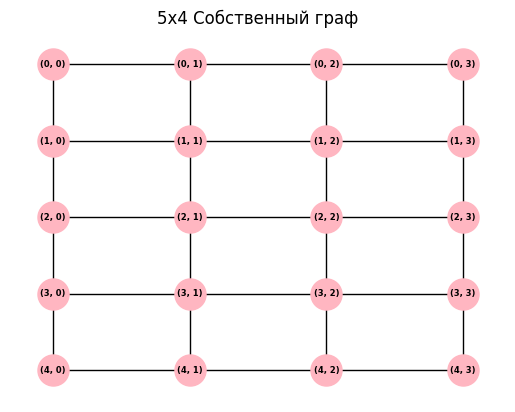

In [11]:
pos = {node: (node[1], -node[0]) for node in G.nodes()}
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title('5x4 Собственный граф')
plt.show()

**2.3. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.**

In [12]:
def generate_grid_graph_with_positions(n, m):
    G = nx.Graph()

    # Добавляем узлы
    for i in range(n):
        for j in range(m):
            G.add_node((i, j), pos=(j, -i))

    # Добавляем рёбра
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))

    return G

In [13]:
G = generate_grid_graph_with_positions(5, 4)

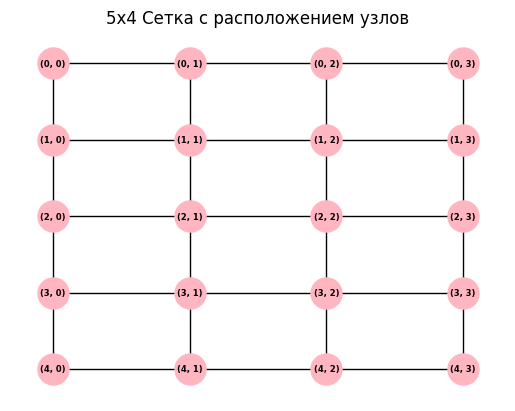

In [14]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title('5x4 Сетка с расположением узлов')
plt.show()

**2.4. Модифицировать функцию 2.2. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.**

In [15]:
def generate_grid_graph_with_wrap(n, m, wrap_rows=False, wrap_columns=False):
    G = nx.Graph()

    # Добавляем узлы
    for i in range(n):
        for j in range(m):
            G.add_node((i, j), pos=(j, -i))

    # Добавляем рёбра
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            elif wrap_rows:
                G.add_edge((i, j), (0, j))

            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            elif wrap_columns:
                G.add_edge((i, j), (i, 0))

    return G

In [16]:
G = generate_grid_graph_with_wrap(5, 4, wrap_rows=True, wrap_columns=True)

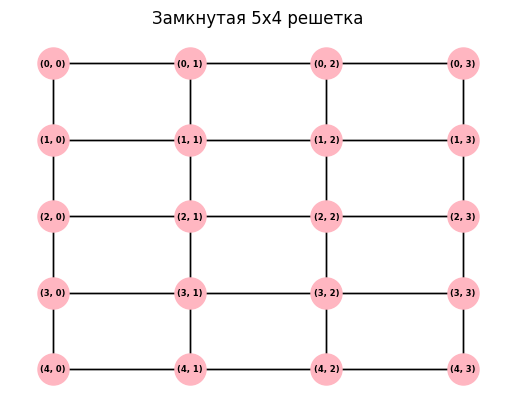

In [17]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title('Замкнутая 5x4 решетка')
plt.show()

**2.5. Построить треугольную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.**

In [18]:
G = nx.triangular_lattice_graph(5, 4)

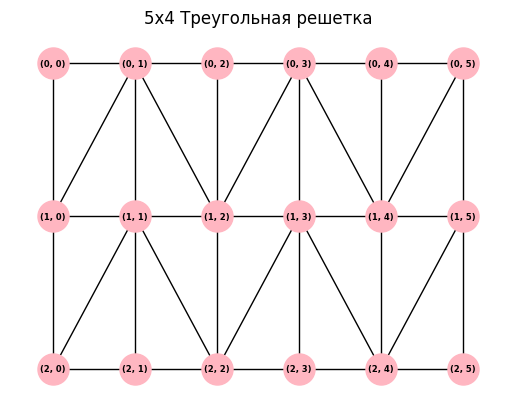

In [19]:
pos = {node: (node[1], -node[0]) for node in G.nodes()}
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title('5x4 Треугольная решетка')
plt.show()

**2.6. Реализовать собственную функцию создания треугольной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.**

In [20]:
def generate_triangular_lattice(n, m):
    G = nx.Graph()

    # Добавление узлов в граф
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))

    # Добавление рёбер между соседними узлами
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            if i + 1 < n and j + 1 < m:
                G.add_edge((i, j), (i + 1, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))

    return G

In [21]:
n, m = 5, 4
G = generate_triangular_lattice(n, m)

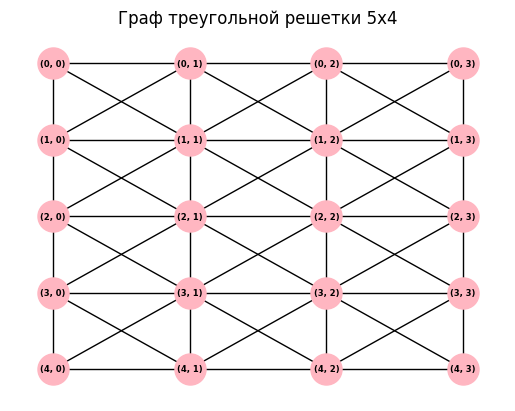

In [22]:
pos = {(i, j): (j, -i) for i in range(n) for j in range(m)}
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Граф треугольной решетки {n}x{m}')
plt.show()

**2.7. Реализовать собственную функцию создания треугольной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.**

In [23]:
def generate_triangular_lattice_with_positions(n, m):
    G = nx.Graph()

    # Добавление узлов с их позициями
    for i in range(n):
        for j in range(m):
            x = j + 0.5 * (i % 2)
            y = i
            G.add_node((i, j), pos=(x, y))

    # Добавление рёбер между соседними узлами
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            if i + 1 < n and j + 1 < m:
                G.add_edge((i, j), (i + 1, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))

    return G

In [24]:
n, m = 5, 4
G = generate_triangular_lattice_with_positions(n, m)

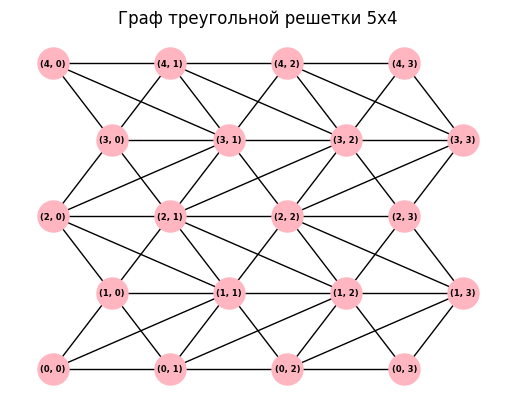

In [25]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Граф треугольной решетки {n}x{m}')
plt.show()

**2.8. Модифицировать функцию 2.2. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.**

In [26]:
def generate_triangular_lattice_with_wrap(n, m, wrap_rows=False, wrap_columns=False):
    G = nx.Graph()

    # Добавление узлов в граф
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))

    # Добавление рёбер между соседними узлами
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            elif wrap_rows:
                G.add_edge((i, j), (0, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            elif wrap_columns:
                G.add_edge((i, j), (i, 0))
            if i + 1 < n and j + 1 < m:
                G.add_edge((i, j), (i + 1, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))

    return G

In [27]:
n, m = 5, 4
G = generate_triangular_lattice_with_wrap(n, m, wrap_rows=True, wrap_columns=True)

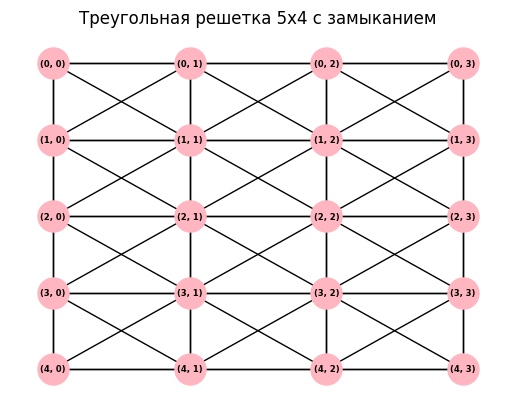

In [28]:
pos = {node: (node[1], -node[0]) for node in G.nodes()}
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Треугольная решетка {n}x{m} с замыканием')
plt.show()

**2.9. Построить гексогональую решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.**

In [29]:
m, n = 5, 4
G = nx.hexagonal_lattice_graph(m, n)

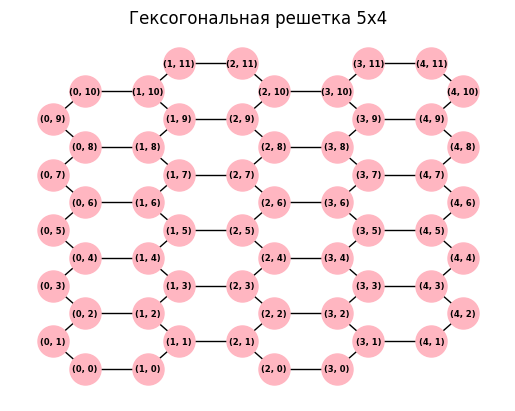

In [30]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Гексогональная решетка {m}x{n}')
plt.show()

**2.2. Реализовать собственную функцию создания гексогональной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.**

In [31]:
def generate_hexagonal_lattice(n, m):
    G = nx.Graph()

    for i in range(n):
        for j in range(m):
            x = 1.5 * j
            y = math.sqrt(3) * (i + 0.5 * (j % 2))

            G.add_node((i, j), pos=(x, y))

    # Добавление рёбер между соседними узлами
    for i in range(n):
        for j in range(m):
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if i + 1 < n and j + 1 < m:
                G.add_edge((i, j), (i + 1, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))

    return G

In [32]:
n, m = 5, 4
G = generate_hexagonal_lattice(n, m)

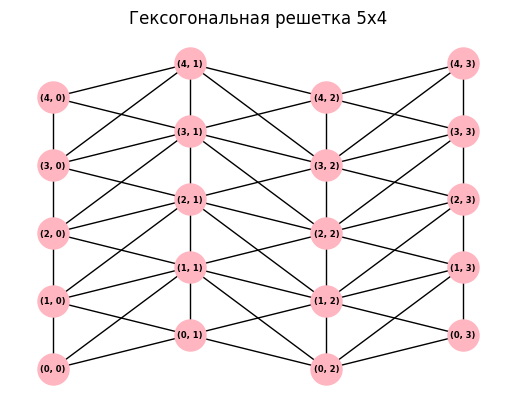

In [33]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Гексогональная решетка {n}x{m}')
plt.show()

**2.3. Реализовать собственную функцию создания гексогональной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.**

In [34]:
def generate_hexagonal_lattice_with_positions(n, m):
    G = nx.Graph()
    dx = 1.5
    dy = math.sqrt(3)

    # Добавление узлов с их позициями
    for i in range(n):
        for j in range(m):
            x = j * dx  # Координата по оси x
            y = i * dy  # Координата по оси y
            if j % 2 == 1:
                y += dy / 2
            G.add_node((i, j), pos=(x, y))

    # Добавление рёбер между соседними узлами
    for i in range(n):
        for j in range(m):
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if i + 1 < n and j + 1 < m:
                G.add_edge((i, j), (i + 1, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))

    return G

In [35]:
n, m = 5, 4
G = generate_hexagonal_lattice_with_positions(n, m)

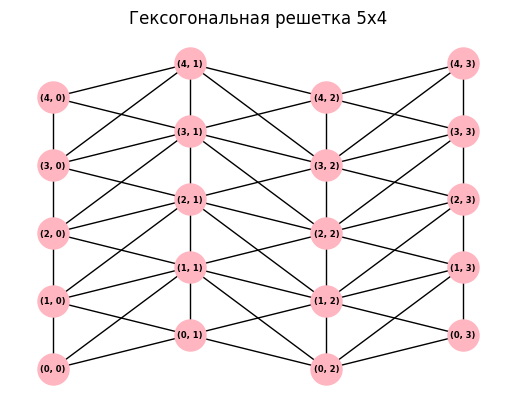

In [36]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Гексогональная решетка {n}x{m}')
plt.show()

**2.4. Модифицировать функцию 2.2. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.**

In [37]:
def generate_hexagonal_lattice_with_wrap(n, m, wrap_rows=False, wrap_columns=False):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            x = 1.5 * j
            y = math.sqrt(3) * (i + 0.5 * (j % 2))
            G.add_node((i, j), pos=(x, y))

    # Добавление рёбер между соседними узлами
    for i in range(n):
        for j in range(m):
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            elif wrap_columns:
                G.add_edge((i, j), (i, 0))

            # Сосед снизу
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            elif wrap_rows:
                G.add_edge((i, j), (0, j))

            # Диагональные рёбра
            if i + 1 < n and j + 1 < m:
                G.add_edge((i, j), (i + 1, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))

    return G

In [38]:
n, m = 5, 4
G = generate_hexagonal_lattice_with_wrap(n, m, wrap_rows=True, wrap_columns=True)

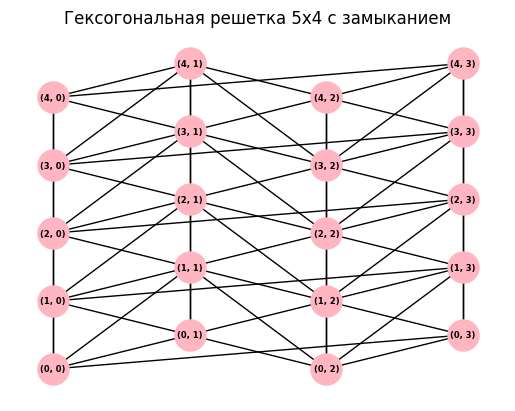

In [39]:
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=500, ax = ax, node_color='lightpink', font_size=6, font_weight='bold')

plt.title(f'Гексогональная решетка {n}x{m} с замыканием')
plt.show()

## 3.

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис).

3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения.

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

In [48]:
def create_flower_graph(n):
  G = nx.Graph()
  G.add_edge(0,1)
  for step in range(1, n+1):
    edges = list(G.edges())
    for u, v in edges:
      G.remove_edge(u, v)
      G.add_edge(u, v)
      new_node = max(G.nodes()) + 1
      G.add_edge(u, new_node)
      G.add_edge(new_node, v)

    print(f'Шаг {step}: Кол-во узлов = {G.number_of_nodes()}, ребер = {G.number_of_edges()}')

  return G

Шаг 1: Кол-во узлов = 3, ребер = 3


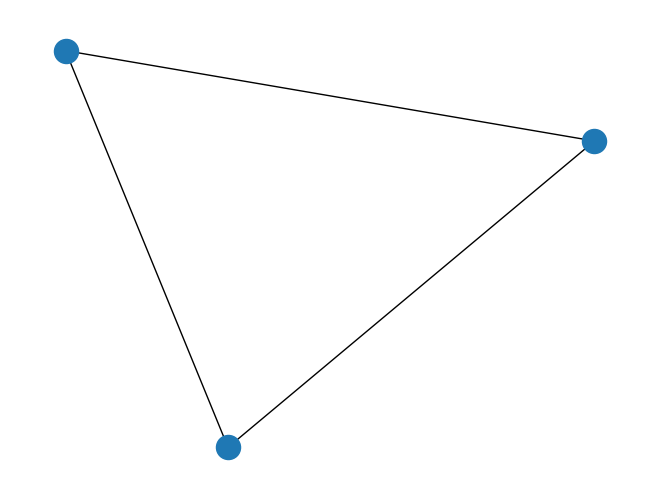

In [49]:
n = 1
flower_graph = create_flower_graph(n)
nx.draw(flower_graph)

Шаг 1: Кол-во узлов = 3, ребер = 3
Шаг 2: Кол-во узлов = 6, ребер = 9


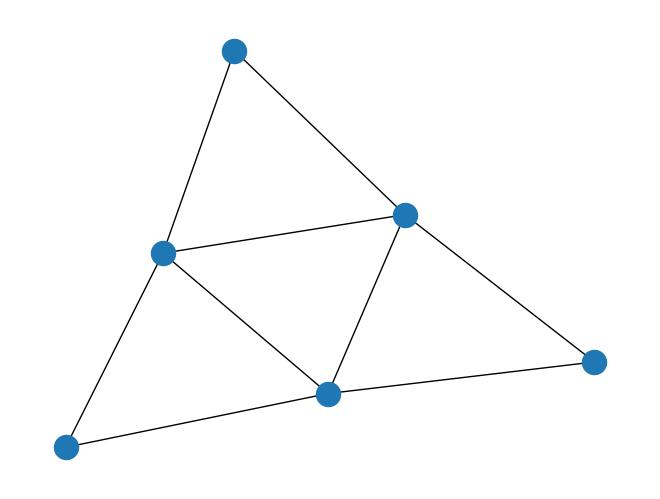

In [43]:
n = 2
flower_graph = create_flower_graph(n)
nx.draw(flower_graph)

Шаг 1: Кол-во узлов = 3, ребер = 3
Шаг 2: Кол-во узлов = 6, ребер = 9
Шаг 3: Кол-во узлов = 15, ребер = 27


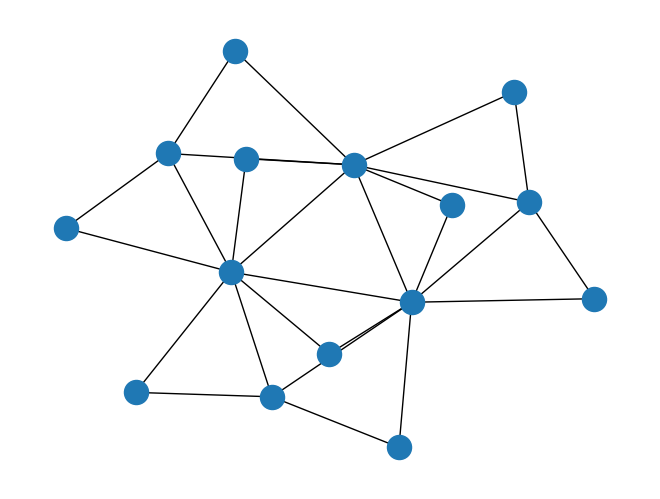

In [82]:
n = 3
flower_graph = create_flower_graph(n)
nx.draw(flower_graph)

In [88]:
# 3.2. Количество узлов, количество связей, средняя степень узла:
num_nodes = flower_graph.number_of_nodes()
num_edges = flower_graph.number_of_edges()
avg_degree = sum(dict(flower_graph.degree()).values()) / num_nodes

print(f"Количество узлов: {num_nodes}")
print(f"Количество связей: {num_edges}")
print(f"Средняя степень узла: {avg_degree:.2f}")

Количество узлов: 15
Количество связей: 27
Средняя степень узла: 3.60


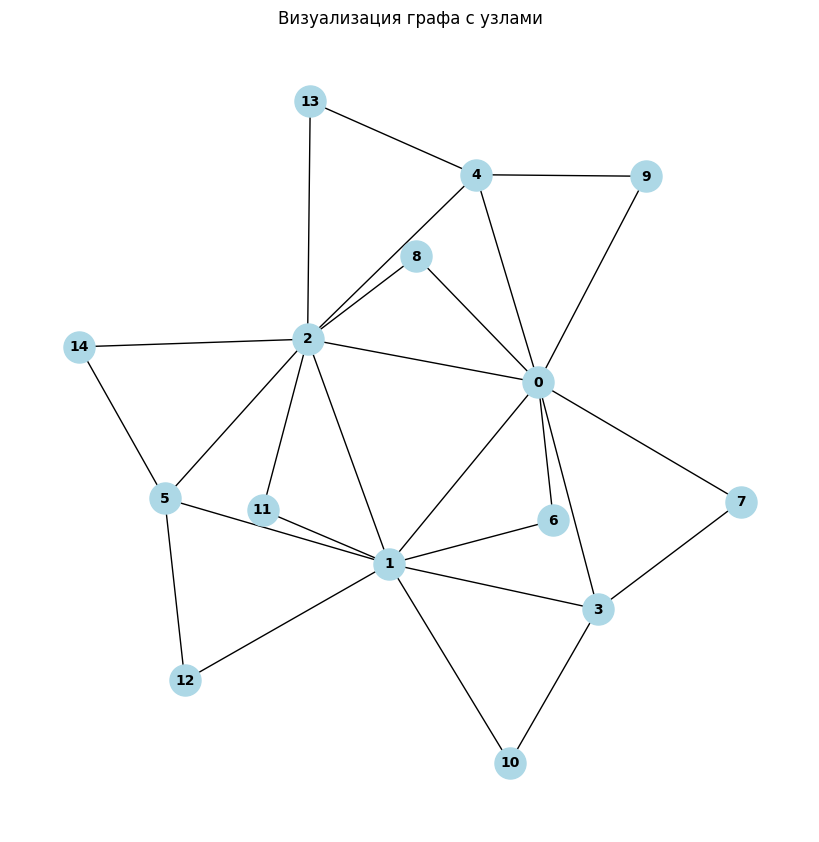

In [89]:
# 3.3. Визуализация графа с указанием идентификаторов узлов:
plt.figure(figsize=(8, 8))
nx.draw(flower_graph, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Визуализация графа с узлами")
plt.show()

In [90]:
# 3.4. Степень каждого узла и сохранение информации о ней в узле:
for node in flower_graph.nodes():
    flower_graph.nodes[node]['degree'] = flower_graph.degree(node)

In [91]:
for node in flower_graph.nodes(data=True):
    print(f"Узел {node[0]}: степень = {node[1]['degree']}")

Узел 0: степень = 8
Узел 1: степень = 8
Узел 2: степень = 8
Узел 3: степень = 4
Узел 4: степень = 4
Узел 5: степень = 4
Узел 6: степень = 2
Узел 7: степень = 2
Узел 8: степень = 2
Узел 9: степень = 2
Узел 10: степень = 2
Узел 11: степень = 2
Узел 12: степень = 2
Узел 13: степень = 2
Узел 14: степень = 2


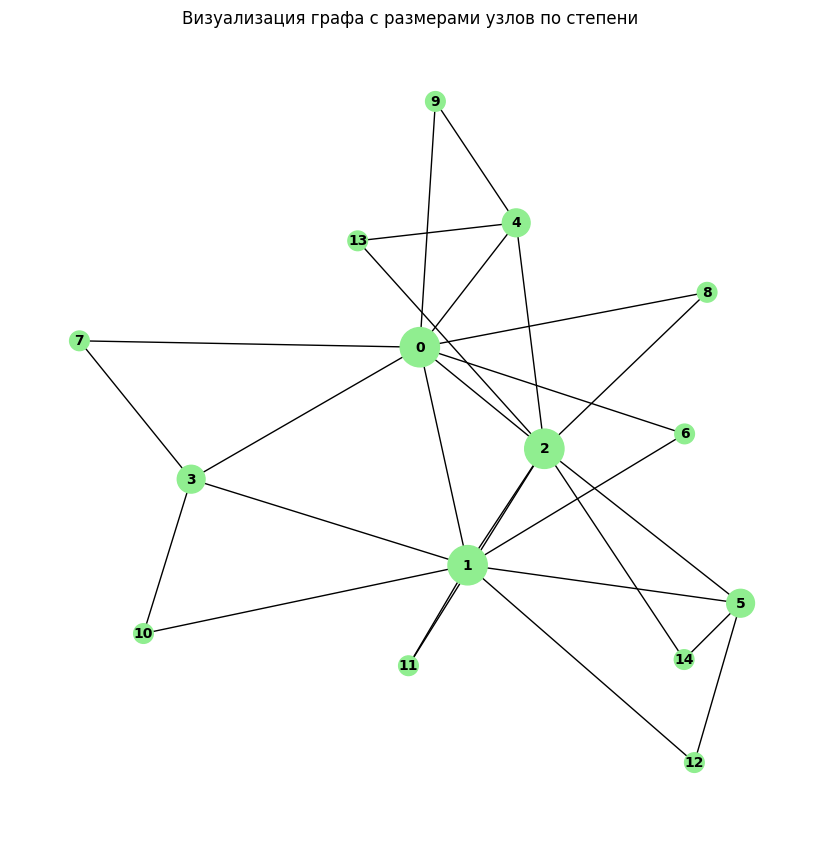

In [93]:
# 3.5. Визуализация графа, где размер узла зависит от его степени:
degrees = dict(flower_graph.degree())
node_sizes = [degrees[node] * 100 for node in flower_graph.nodes()]  # Размер узла пропорционален его степени

# Визуализация графа с узлами, размер которых зависит от степени узла
plt.figure(figsize=(8, 8))
nx.draw(flower_graph, with_labels=True, node_size=node_sizes, node_color='lightgreen', font_size=10, font_weight='bold')
plt.title("Визуализация графа с размерами узлов по степени")
plt.show()

# 4.

Датасеты с сетями:

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



# 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

In [94]:
# Создание цветочного графа:
n = 2
flower_graph = create_flower_graph(n)

Шаг 1: Кол-во узлов = 3, ребер = 3
Шаг 2: Кол-во узлов = 6, ребер = 9


In [95]:
# 4.1. Коэффициент кластеризации каждого узла и сохранение информации в узле:
clustering_coeffs = nx.clustering(flower_graph)  # Считаем коэффициенты кластеризации для каждого узла

for node in flower_graph.nodes():
    flower_graph.nodes[node]['clustering'] = clustering_coeffs[node]  # Сохраняем в атрибут узла

for node in flower_graph.nodes(data=True):
    print(f"Узел {node[0]}: коэффициент кластеризации = {node[1]['clustering']:.2f}")

Узел 0: коэффициент кластеризации = 0.50
Узел 1: коэффициент кластеризации = 0.50
Узел 2: коэффициент кластеризации = 0.50
Узел 3: коэффициент кластеризации = 1.00
Узел 4: коэффициент кластеризации = 1.00
Узел 5: коэффициент кластеризации = 1.00


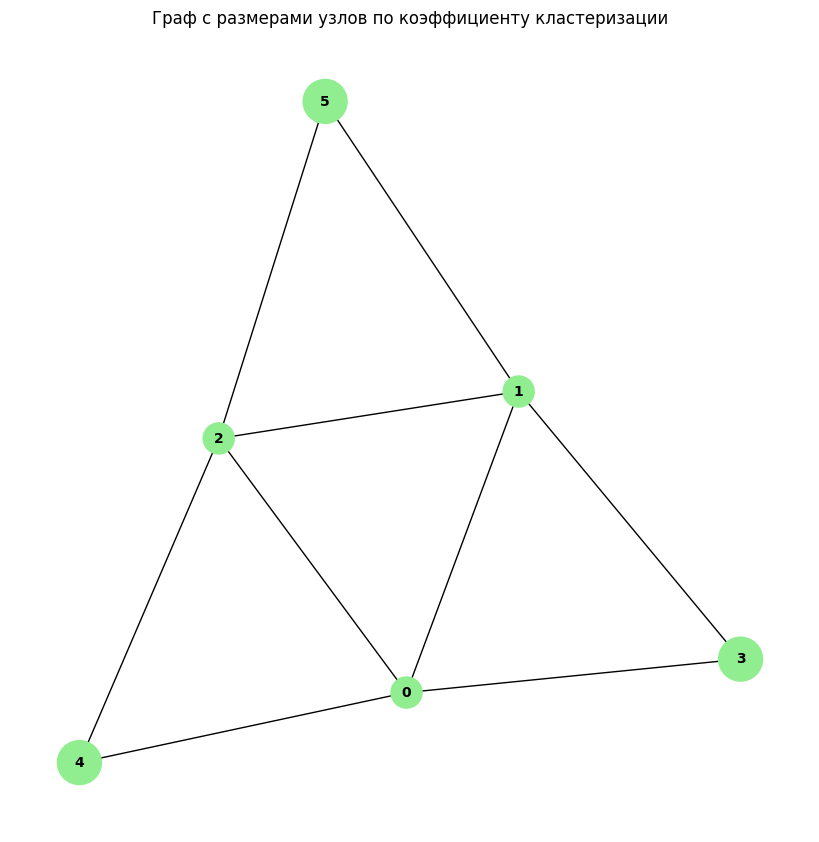

In [96]:
# 4.2. Визуализация графа, где размер узла зависит от коэффициента кластеризации:
plt.figure(figsize=(8, 8))
node_sizes = [flower_graph.nodes[node]['clustering'] * 1000 for node in flower_graph.nodes()]  # размер узлов зависит от кластеризации
nx.draw(flower_graph, with_labels=True, node_size=node_sizes, node_color='lightgreen', font_size=10, font_weight='bold')
plt.title("Граф с размерами узлов по коэффициенту кластеризации")
plt.show()

<Figure size 800x800 with 0 Axes>

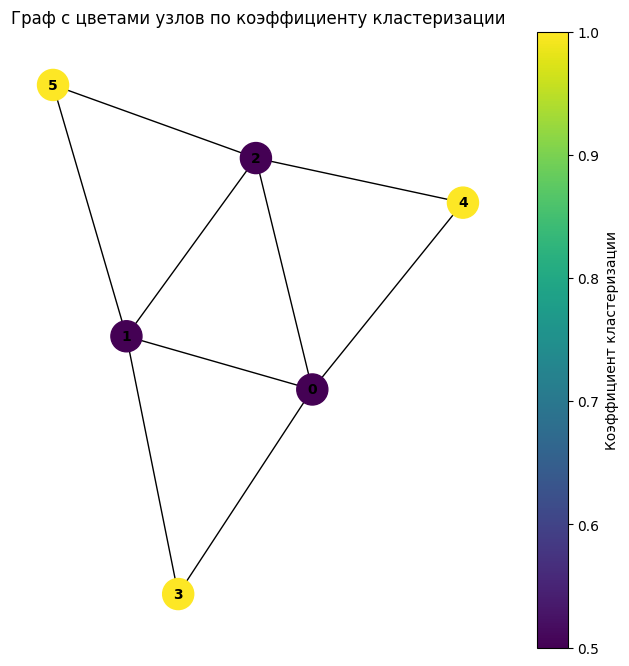

In [101]:
# 4.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации:
plt.figure(figsize=(8, 8))
node_colors = [flower_graph.nodes[node]['clustering'] for node in flower_graph.nodes()]

fig, ax = plt.subplots(figsize=(8, 8))

nx.draw(flower_graph, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, node_size=500,
        font_size=10, font_weight='bold', ax=ax)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
plt.colorbar(sm, ax=ax, label="Коэффициент кластеризации")

plt.title("Граф с цветами узлов по коэффициенту кластеризации")
plt.show()

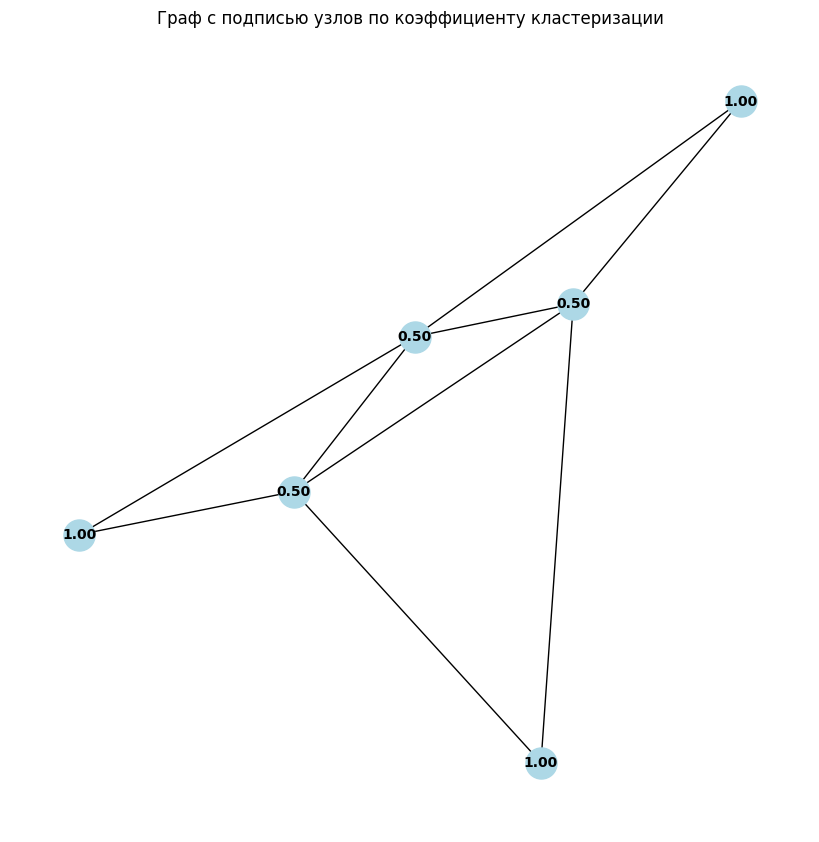

In [102]:
# 4.6. Визуализация графа с коэффициентом кластеризации в подписи к узлу:
plt.figure(figsize=(8, 8))
labels = {node: f"{flower_graph.nodes[node]['clustering']:.2f}" for node in flower_graph.nodes()}
nx.draw(flower_graph, labels=labels, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Граф с подписью узлов по коэффициенту кластеризации")
plt.show()

In [99]:
# 4.7. Среднее значение коэффициента кластеризации:
avg_clustering = nx.average_clustering(flower_graph)
print(f"Среднее значение коэффициента кластеризации для графа: {avg_clustering:.2f}")

Среднее значение коэффициента кластеризации для графа: 0.75


# 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

In [100]:
# 5.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество_узлов_с_данной_степенью), картежи в списке отсортированы по возрастанию степени.
degree_counts = dict()
for node, degree in flower_graph.degree():
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

sorted_degree_distribution = sorted(degree_counts.items())

print(sorted_degree_distribution)

[(2, 3), (4, 3)]


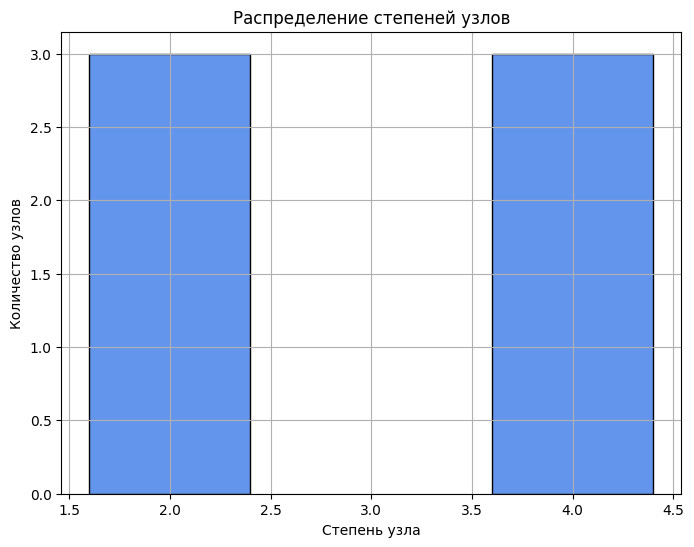

In [103]:
# 5.2 График распределения степеней узлов.4

degrees, counts = zip(*sorted_degree_distribution)

plt.figure(figsize=(8, 6))
plt.bar(degrees, counts, color='cornflowerblue', edgecolor='black')
plt.xlabel("Степень узла")
plt.ylabel("Количество узлов")
plt.title("Распределение степеней узлов")
plt.grid(True)
plt.show()

In [71]:
# 5.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).
total_nodes = sum(counts)
relative_frequencies = [count / total_nodes for count in counts]

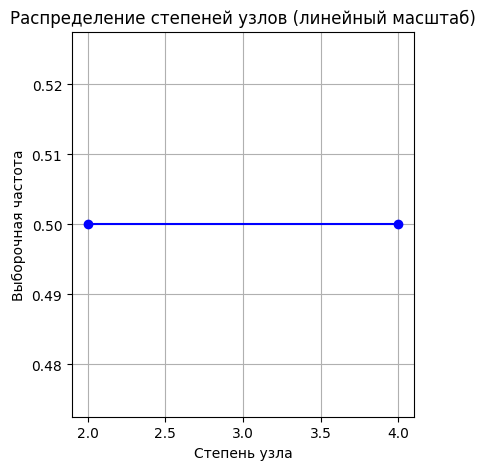

In [72]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(degrees, relative_frequencies, marker='o', color='blue')
plt.xlabel("Степень узла")
plt.ylabel("Выборочная частота")
plt.title("Распределение степеней узлов (линейный масштаб)")
plt.grid(True)

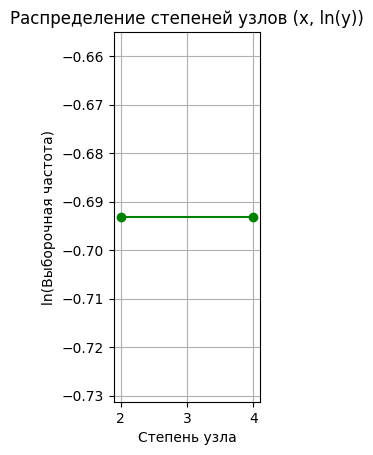

In [74]:
import numpy as np
plt.subplot(1, 3, 2)
plt.plot(degrees, np.log(relative_frequencies), marker='o', color='green')
plt.xlabel("Степень узла")
plt.ylabel("ln(Выборочная частота)")
plt.title("Распределение степеней узлов (x, ln(y))")
plt.grid(True)

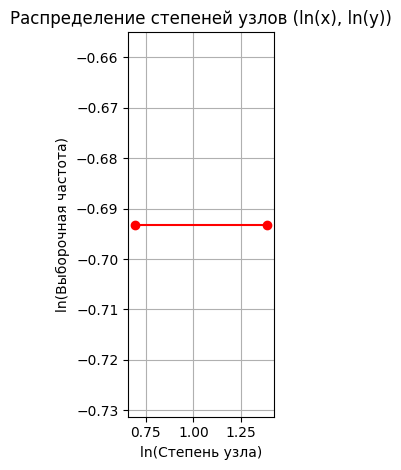

In [75]:
plt.subplot(1, 3, 3)
plt.plot(np.log(degrees), np.log(relative_frequencies), marker='o', color='red')
plt.xlabel("ln(Степень узла)")
plt.ylabel("ln(Выборочная частота)")
plt.title("Распределение степеней узлов (ln(x), ln(y))")
plt.grid(True)

plt.tight_layout()
plt.show()

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

In [76]:
# 6.1. Два произвольных узла и кратчайший путь между ними.
import random

node1, node2 = random.sample(list(flower_graph.nodes()), 2)

shortest_path = nx.shortest_path(flower_graph, source=node1, target=node2)

print(f"Случайные узлы: {node1} и {node2}")
print(f"Кратчайший путь: {shortest_path}")

Случайные узлы: 2 и 0
Кратчайший путь: [2, 0]


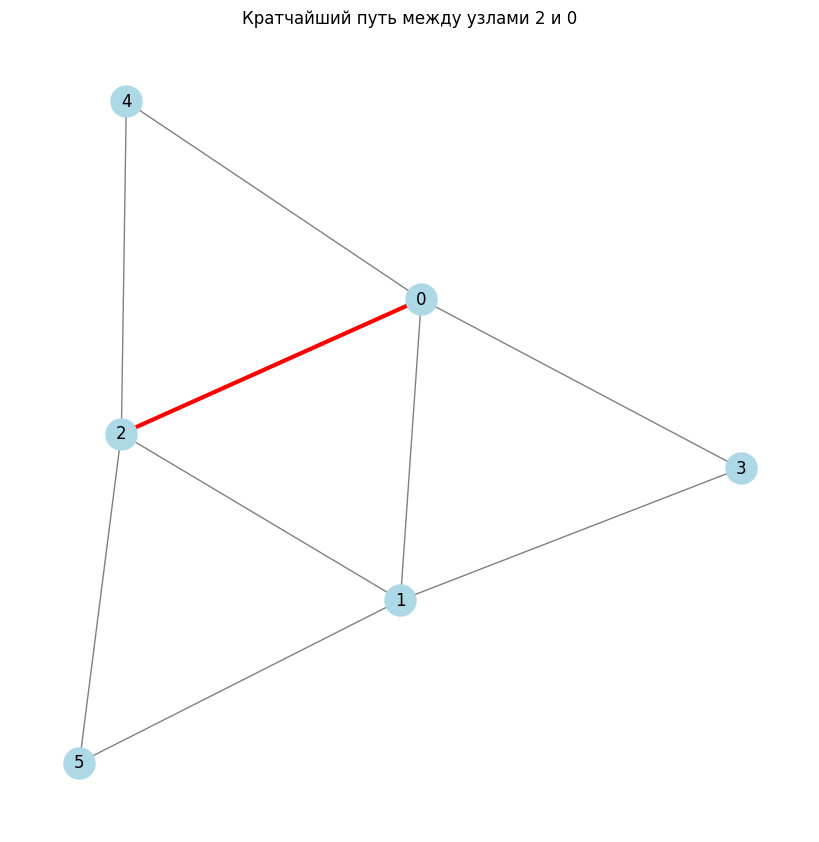

In [78]:
# 6.2. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.
path_edges = list(zip(shortest_path, shortest_path[1:]))

plt.figure(figsize=(8, 8))

pos = nx.spring_layout(flower_graph)
nx.draw(flower_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

nx.draw_networkx_edges(flower_graph, pos, edgelist=path_edges, edge_color='red', width=3)

plt.title(f"Кратчайший путь между узлами {node1} и {node2}")
plt.show()

In [79]:
# 6.3. Средний кратчайший путь для всего графа
if nx.is_connected(flower_graph):
    avg_shortest_path_length = nx.average_shortest_path_length(flower_graph)
    print(f"Средний кратчайший путь для графа: {avg_shortest_path_length:.2f}")
else:
    print("Граф несвязный, средний кратчайший путь нельзя вычислить.")

Средний кратчайший путь для графа: 1.40


In [80]:
# 6.4. Диаметр графа
if nx.is_connected(flower_graph):
    diameter = nx.diameter(flower_graph)
    print(f"Диаметр графа: {diameter}")
else:
    print("Граф несвязный, диаметр нельзя вычислить.")

Диаметр графа: 2


## 7.

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения.

Шаг 1: Количество узлов = 5, количество связей = 5
Шаг 2: Количество узлов = 20, количество связей = 25


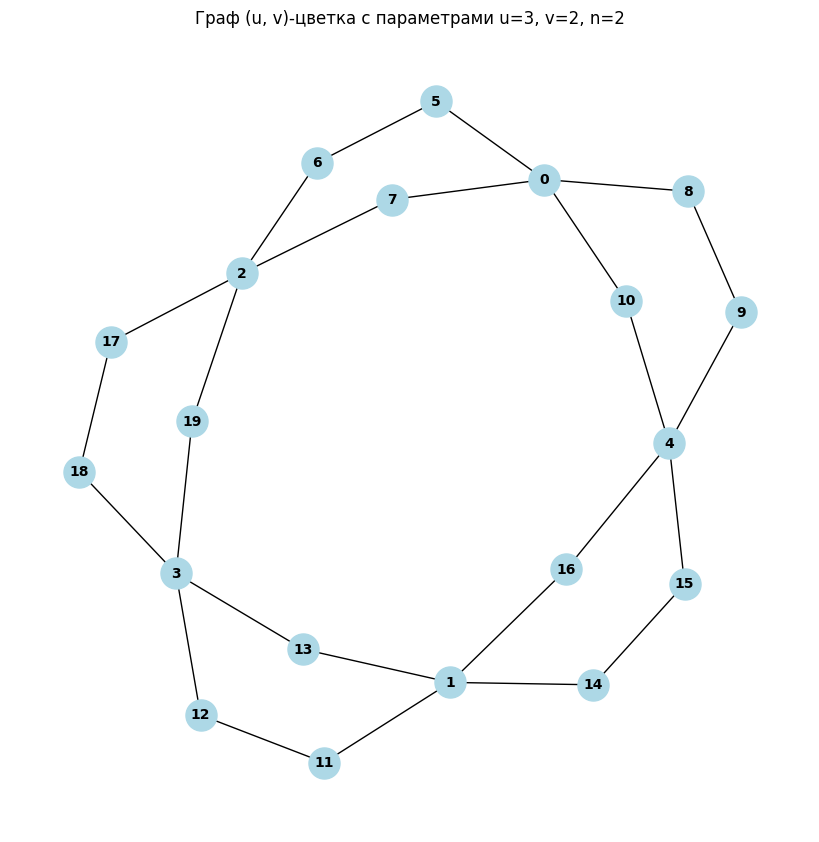

In [104]:
import networkx as nx
import matplotlib.pyplot as plt

def create_uv_flower_graph(u, v, n):
    G = nx.Graph()
    G.add_edge(0, 1)

    for step in range(n):
        edges = list(G.edges())
        for u_node, v_node in edges:

            G.remove_edge(u_node, v_node)

            prev_node = u_node
            for _ in range(u - 1):
                new_node = max(G.nodes()) + 1
                G.add_edge(prev_node, new_node)
                prev_node = new_node
            G.add_edge(prev_node, v_node)

            prev_node = u_node
            for _ in range(v - 1):
                new_node = max(G.nodes()) + 1
                G.add_edge(prev_node, new_node)
                prev_node = new_node
            G.add_edge(prev_node, v_node)

        print(f'Шаг {step + 1}: Количество узлов = {G.number_of_nodes()}, количество связей = {G.number_of_edges()}')

    return G


# Пример использования
u = 3
v = 2
n = 2
uv_flower_graph = create_uv_flower_graph(u, v, n)

# Визуализация графа
plt.figure(figsize=(8, 8))
nx.draw(uv_flower_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title(f"Граф (u, v)-цветка с параметрами u={u}, v={v}, n={n}")
plt.show()